In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='dark')

In [3]:
df_all = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', na_values=['NULL', 'PrivacySuppressed'], low_memory=False)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Columns: 3214 entries, UNITID to BBRR4_PP_NOMALE_DISCHARGE
dtypes: float64(2509), int64(14), object(691)
memory usage: 160.4+ MB


In [4]:
degrees = [
        'Non-degree',
        'Certificate',
        'Associate',
        'Bachelor\'s',
        'Postgraduate'
]
DegreeCat = pd.CategoricalDtype(degrees, ordered=True)
df_all.HIGHDEG = (
    df_all.HIGHDEG
    .replace({i:degree for i, degree in enumerate(degrees)})
    .astype(DegreeCat)
)
df_all.CONTROL.replace({
        1:'Public',
        2:'Private nonprofit',
        3:'Private for-profit'
    },
    inplace=True
)

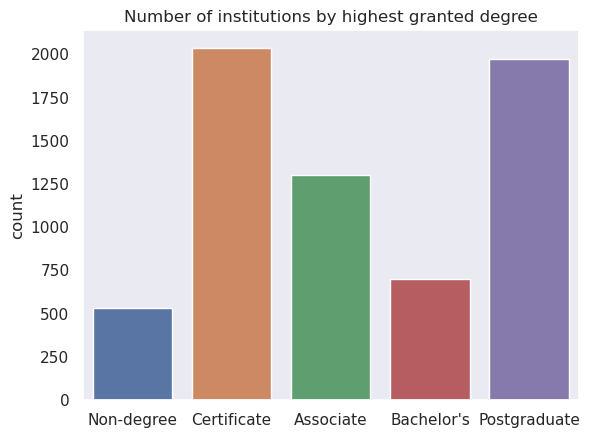

In [23]:
ax = sns.countplot(df_all, x='HIGHDEG')
ax.set_title('Number of institutions by highest granted degree')
ax.set_xlabel('');

In [6]:
df = df_all[df_all.HIGHDEG > 'Associate'].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 0 to 6037
Columns: 3214 entries, UNITID to BBRR4_PP_NOMALE_DISCHARGE
dtypes: category(1), float64(2509), int64(12), object(692)
memory usage: 65.5+ MB


count     2665.000000
mean     14003.260413
std       9181.713905
min          0.000000
25%       7348.000000
50%      12410.000000
75%      18166.000000
max      62395.000000
Name: TUITFTE, dtype: float64

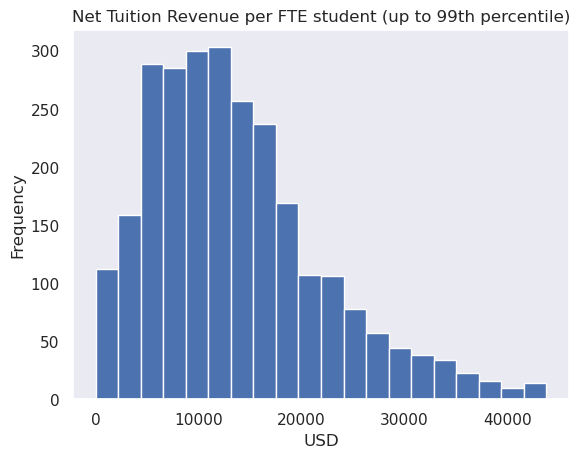

In [7]:
tuit_99_ptile = np.percentile(df.TUITFTE.dropna(), 99)
ax = df[df.TUITFTE<=tuit_99_ptile].TUITFTE.plot.hist(
    bins=20, 
    title='Net Tuition Revenue per FTE student (up to 99th percentile)')
ax.set_xlabel('USD');
df.TUITFTE.describe()
# print(df.loc[df.TUITFTE>40000, 'INSTNM'].to_numpy())

count      2665.000000
mean      11833.746341
std       17288.031328
min           0.000000
25%        5816.000000
50%        8676.000000
75%       12730.000000
max      598759.000000
Name: INEXPFTE, dtype: float64

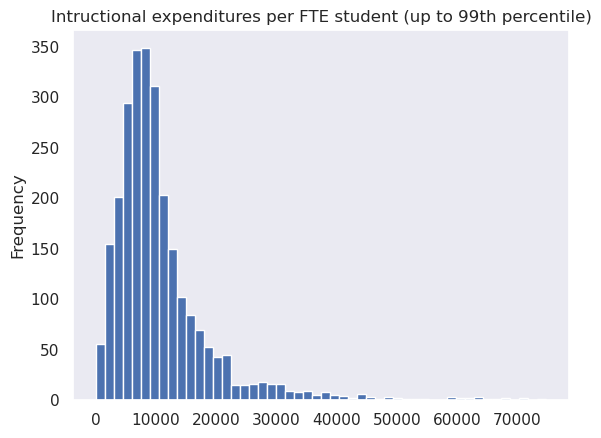

In [8]:
expend_99_ptile = np.percentile(df.INEXPFTE.dropna(), 99)
df[df.INEXPFTE<=expend_99_ptile].INEXPFTE.plot.hist(bins=50, title='Intructional expenditures per FTE student (up to 99th percentile)')
df.INEXPFTE.describe()
# df.loc[df.INEXPFTE>150000, 'INSTNM']
# expend_99_ptile

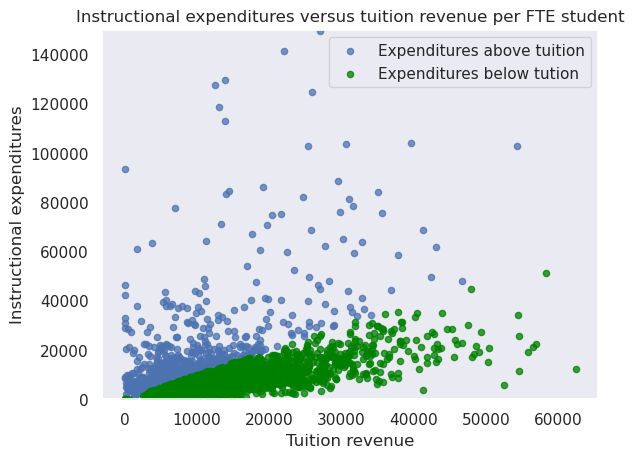

In [9]:
ax = df[df.INEXPFTE>df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    label='Expenditures above tuition',
    title='Instructional expenditures versus tuition revenue per FTE student'
)
df[df.INEXPFTE<=df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    ax=ax, 
    c='green', 
    label='Expenditures below tution',
    xlabel='Tuition revenue',
    ylabel='Instructional expenditures'
)
# ax.set_xscale('function', functions=(lambda values: values/1000, lambda values: values*1000))
ax.legend()
# plt.plot(np.arange(200_000), np.arange(200_000), c='black');
# ax.set_xlim(0,150_000)
ax.set_ylim(0,150_000);

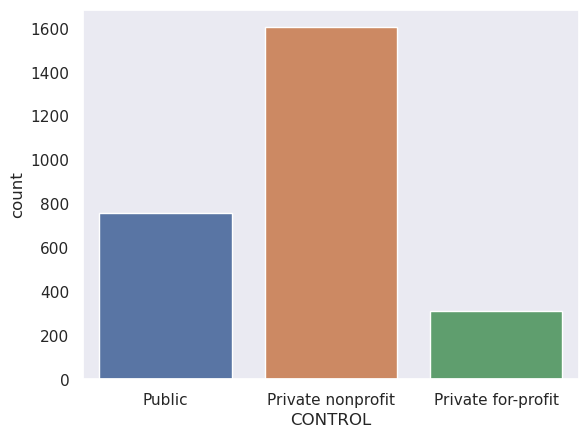

In [10]:
ax = sns.countplot(df, x='CONTROL')

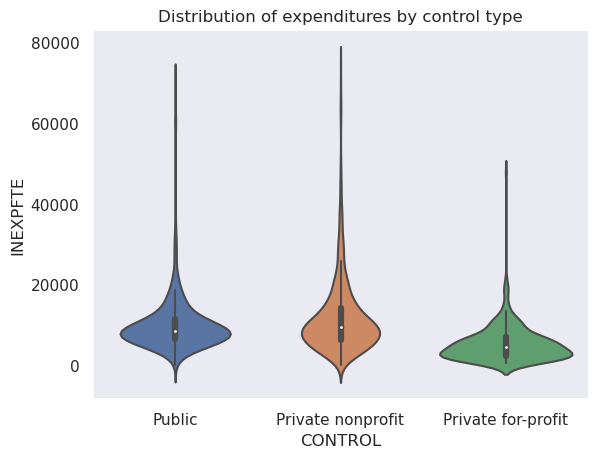

In [11]:
ax = sns.violinplot(df[df.INEXPFTE<=expend_99_ptile], x='CONTROL', y='INEXPFTE')
ax.set_title('Distribution of expenditures by control type');

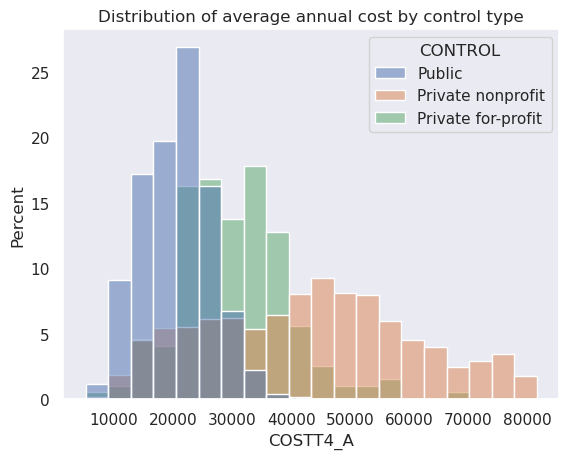

In [22]:
ax = sns.histplot(df, x='COSTT4_A', hue='CONTROL', common_norm=False, stat='percent')
# df.COSTT4_A.plot.hist(title='Distribution of average annual cost', c=df.CONTROL);
ax.set_title('Distribution of average annual cost by control type');

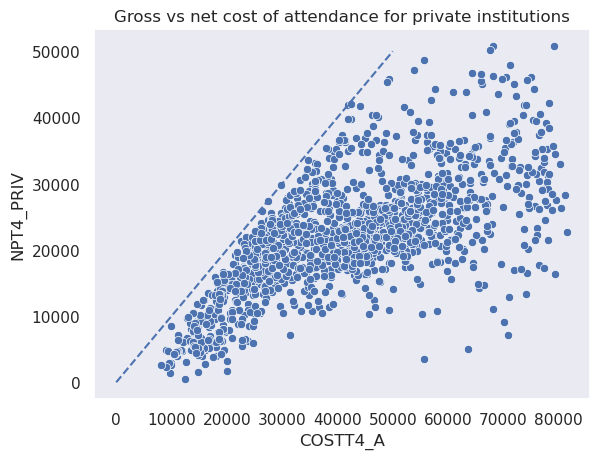

In [13]:
ax = sns.scatterplot(df, x='COSTT4_A', y='NPT4_PRIV')
ax.plot([0,50_000],[0,50_000], c='b', linestyle='--')
ax.set_title('Gross vs net cost of attendance for private institutions');

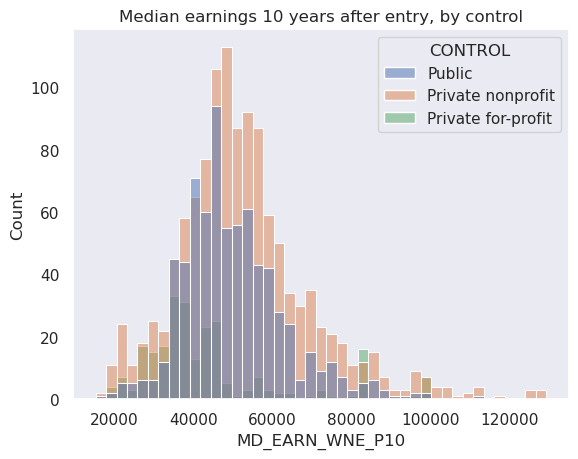

In [14]:
ax = sns.histplot(df, x='MD_EARN_WNE_P10', hue='CONTROL')
ax.set_title('Median earnings 10 years after entry, by control');
# df.MD_EARN_WNE_P10.hist()

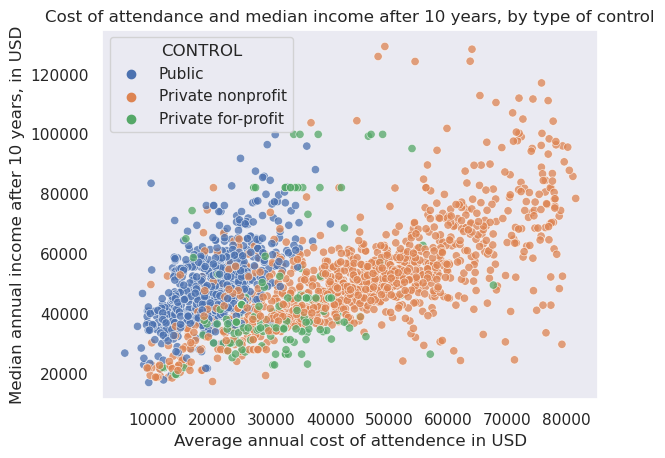

In [15]:
ax = sns.scatterplot(df, x='COSTT4_A', y='MD_EARN_WNE_P10', hue='CONTROL', alpha=0.75)
ax.set_xlabel('Average annual cost of attendence in USD')
ax.set_ylabel('Median annual income after 10 years, in USD')
ax.set_title('Cost of attendance and median income after 10 years, by type of control');


In [16]:
print('10 year all undergrad')
print((df.DBRR10_FED_UG_NUM/df.DBRR10_FED_UG_N).describe())
print('4 year all undergrad')
print((df.DBRR4_FED_UG_NUM/df.DBRR4_FED_UG_N).describe())
print('4 year undergrad completed')
print((df.DBRR4_FED_UGCOMP_NUM/df.DBRR4_FED_UGCOMP_N).describe())

10 year all undergrad
count     2148.000000
mean      9570.227419
std       4525.475422
min          0.000000
25%       6545.413566
50%       8945.540876
75%      11784.502509
max      71336.384615
dtype: float64
4 year all undergrad
count     2197.000000
mean     14794.898109
std       4462.355732
min       2447.872093
25%      12259.954787
50%      14747.778677
75%      17214.412373
max      35723.454545
dtype: float64
4 year undergrad completed
count     2111.000000
mean     19792.747530
std       7242.837239
min       2657.313433
25%      15072.424565
50%      19168.356089
75%      23336.422651
max      48069.559122
dtype: float64


<Axes: >

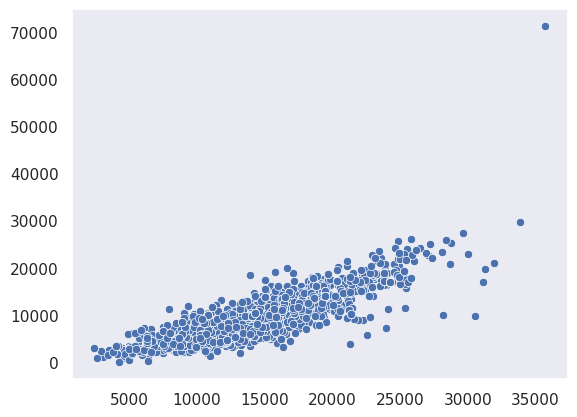

In [17]:
sns.scatterplot(y=df.DBRR10_FED_UG_NUM/df.DBRR10_FED_UG_N, x=df.DBRR4_FED_UG_NUM/df.DBRR4_FED_UG_N)

4 year all undergrad corrected for non-recipients
count     2001.000000
mean      8394.225170
std       4783.723324
min          8.440786
25%       5047.041667
50%       8293.167272
75%      11354.992199
max      26653.482590
dtype: float64


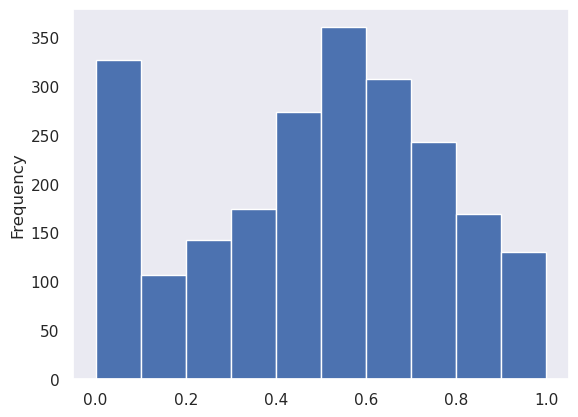

In [18]:
print('4 year all undergrad corrected for non-recipients')
print((df.DBRR4_FED_UG_NUM/df.DBRR4_FED_UG_N*df.FTFTPCTFLOAN)[df.FTFTPCTFLOAN > 0].describe())
df.FTFTPCTFLOAN.plot.hist();

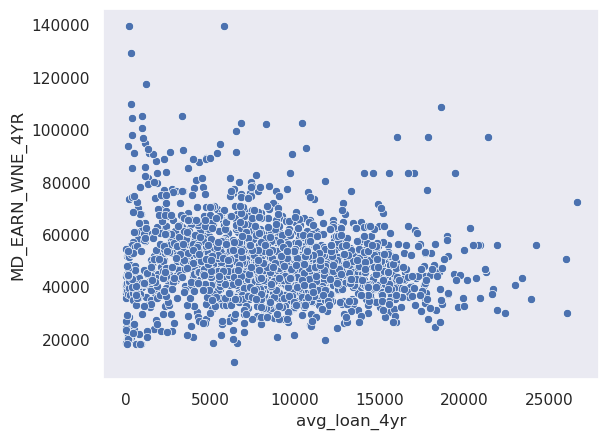

In [19]:
df['avg_loan_4yr'] = df.DBRR4_FED_UG_NUM/df.DBRR4_FED_UG_N*df.FTFTPCTFLOAN
df.loc[df.FTFTPCTFLOAN == 0, 'avg_loan_4yr'] = np.nan
sns.scatterplot(df, x='avg_loan_4yr', y='MD_EARN_WNE_4YR');

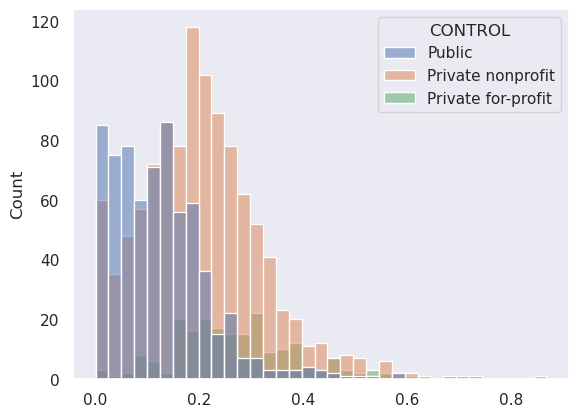

In [20]:
sns.histplot(x=df.avg_loan_4yr / df.MD_EARN_WNE_4YR, hue=df.CONTROL);